# Importing libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
plt.rcParams['figure.figsize'] = 12, 7  
plt.rcParams['lines.markeredgewidth'] = 1  
import scipy.stats as stats
import scipy

# Loading the data

In [5]:
pattern_data_path = "C:\\Users\\alicj\\Documents\\GitHub\\CSS_Alien\\Pattern_data\\OTS_2_Default_4"
data_02_default = pd.read_csv(os.path.join(pattern_data_path, 'General data.csv'))

In [6]:
data_02_default.columns = ['time step', 'number of clusters', 'number of active clusters',
       'number of cells', 'number of particles', 'number of tokens',
       'total internal energy', 'total kinetic energy']

## Adding a column with a fraction of active clusters

In [7]:
data_02_default['fraction of active clusters'] = data_02_default['number of active clusters']/data_02_default['number of clusters']

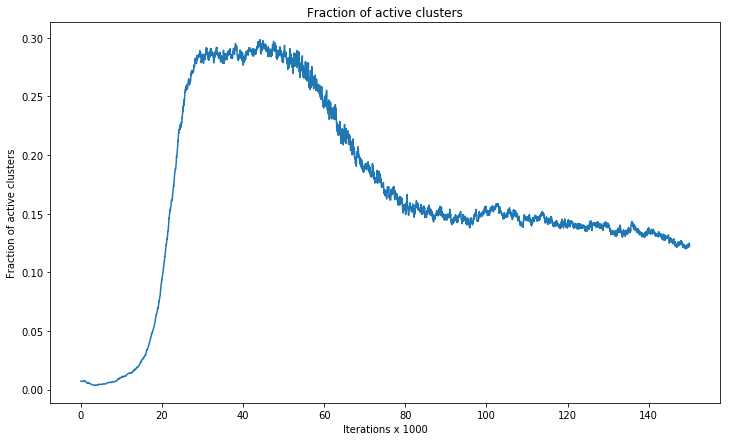

In [9]:
plt.plot(data_02_default['time step']/1000, data_02_default['fraction of active clusters'])
plt.xlabel('Iterations x 1000')
plt.ylabel('Fraction of active clusters')
plt.title("Fraction of active clusters");
#plt.savefig('time vs fraction.jpg', dpi=300);

At around 30k iterations the food is gone and we can observe that after the percentage of clusters with tokens starts slowly decreasing until it reaches a stable value of around 0.13 at 74000 iterations

Text(0, 0.5, 'Number of tokens')

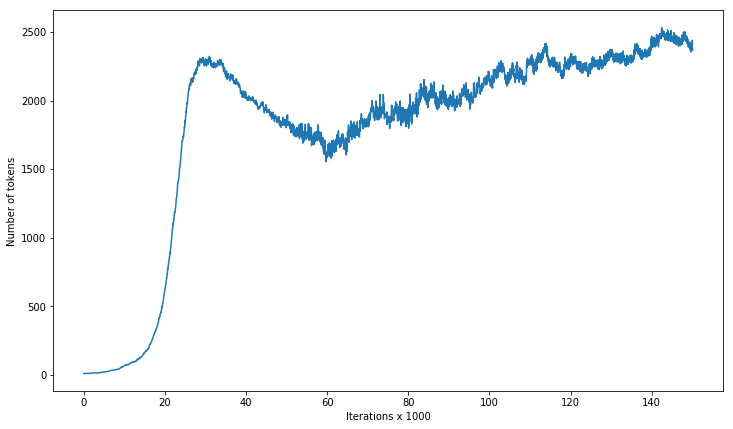

In [10]:
plt.plot(data_02_default['time step']/1000, data_02_default['number of tokens'])
plt.xlabel('Iterations x 1000')
plt.ylabel('Number of tokens');

## Calculating mean ,,step'' size

In [11]:
data_02_default['time step']

0           12
1           82
2          148
3          211
4          272
         ...  
4118    149973
4119    150001
4120    150006
4121    150040
4122    150072
Name: time step, Length: 4123, dtype: int64

In [26]:
data_02_default['diff'] = data_02_default['time step'].sub(data_02_default['time step'].shift())
data_02_default['diff'].iloc[0] = data_02_default['time step'].iloc[0]

C:\Users\alicj\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
np.mean(data_02_default['diff'])

36.39873878243997

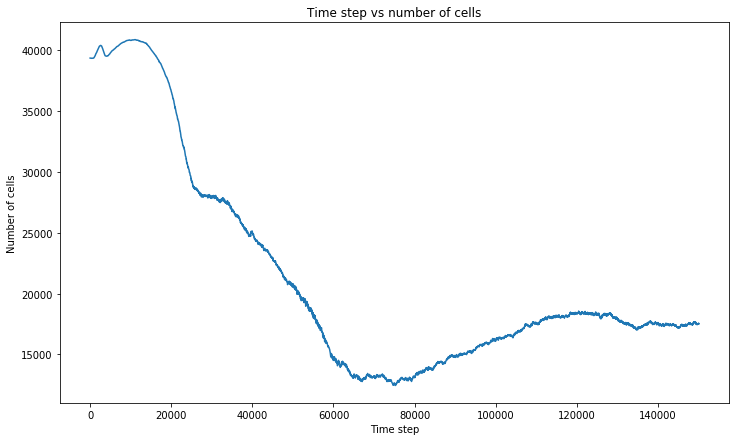

In [15]:
plt.plot(data_02_default['time step'], data_02_default['number of cells'])
plt.xlabel('Time step')
plt.ylabel('Number of cells')
plt.title("Time step vs number of cells");
#plt.savefig('time vs cells.jpg', dpi=300)

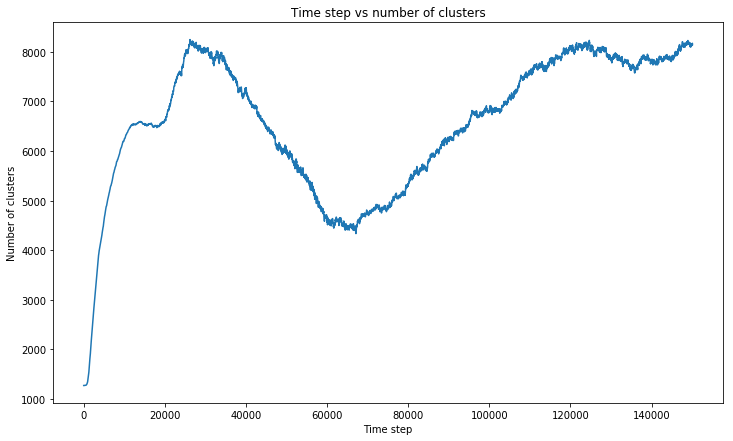

In [16]:
plt.plot(data_02_default['time step'], data_02_default['number of clusters'])
plt.xlabel('Time step')
plt.ylabel('Number of clusters')
plt.title("Time step vs number of clusters");
#plt.savefig('time vs clusters.jpg', dpi=300);

The number of clusters grows until around 30k (when the all the food is gone) and decreases for the next 44k iterations until time step 7400 when it starts growing again - this corresponds to the change in dynamics of fraction of active clusters, where the fraction grows unitl time step 30k and decreases until timestep 74k

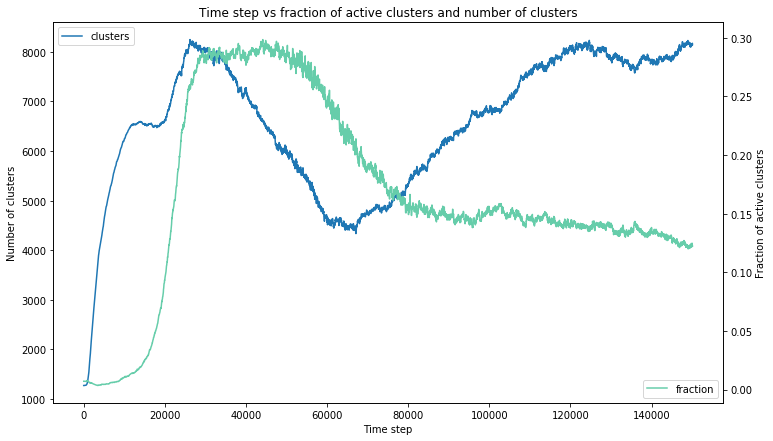

In [17]:
fig,ax = plt.subplots()
ax.plot(data_02_default['time step'], data_02_default['number of clusters'], color="#1f77b4", label = 'clusters')
#ax.plot(data_02_default['time step'], data_02_default['number of tokens'])
ax.set_ylabel('Number of clusters')
ax.set_xlabel('Time step')
ax.legend()

ax2=ax.twinx()
#ax2.plot(data_02_default['time step'], data_02_default['fraction of active clusters'],color="mediumaquamarine", label = 'fraction')
ax2.plot(data_02_default['time step'], data_02_default['fraction of active clusters'],color="mediumaquamarine", label = 'fraction')
ax2.set_ylabel('Fraction of active clusters')
ax2.legend(loc = 4)
ax2.set_title("Time step vs fraction of active clusters and number of clusters");
#plt.savefig('time vs clusters and fraction.jpg', dpi = 300)

As the number of clusters and the number of tokens increase the fraction of clusters with tokens also increases. As the food is gone after around 30k time steps the number of tokens decreases very slightly whereas the number of clusters increases more rapidly. This causes a slow decrease in the fraction of clusters with tokens. After 74k time steps, the number of tokens faintly increases, the number of clusters also increases and the fraction of clusters with tokens is approximately stable at around 0.13/0.14 

Total kinetic energy has type string and some nan values so we filter them out, approximately 0.363 of values of total kinetic energy are missing

In [18]:
mask = data_02_default['total kinetic energy'] != ' nan'
data_02_default_nonan = data_02_default[mask]

Calculating what fraction of kinetic energy values is missing

In [19]:
sum(mask == 0)/(sum(mask == 1))

0.36342592592592593

In [20]:
kinetic_energy = np.array(pd.to_numeric(data_02_default_nonan['total kinetic energy']))

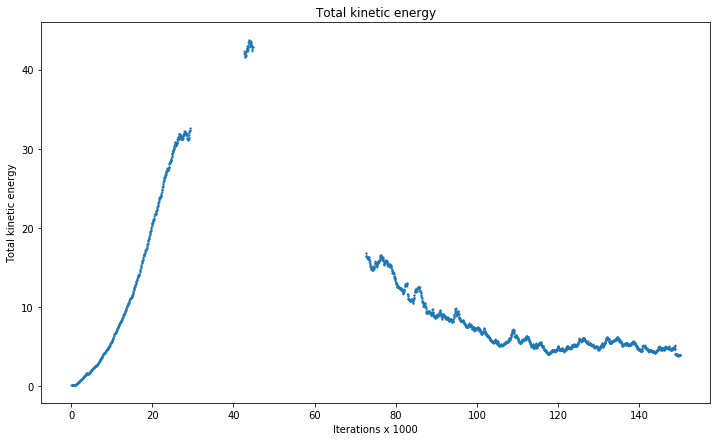

In [22]:
plt.scatter(data_02_default_nonan['time step']/1000, kinetic_energy, s = 1)
plt.xlabel('Iterations x 1000')
plt.ylabel('Total kinetic energy')
plt.title('Total kinetic energy');

Correlation matrix using Spearman correlation, as from EDA above we expect most of the relationships to be nonlinear

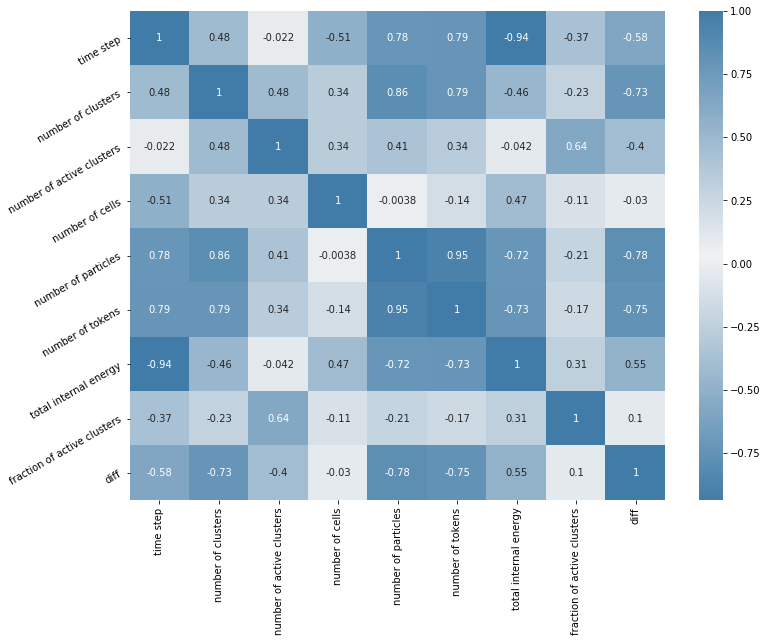

In [23]:
plt.figure(figsize=(12,9))
color = sns.diverging_palette(240, 240, as_cmap=True)
heatmap = sns.heatmap(data_02_default.corr('spearman'),annot=True, cmap=color, xticklabels=True, yticklabels=True) 
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30);

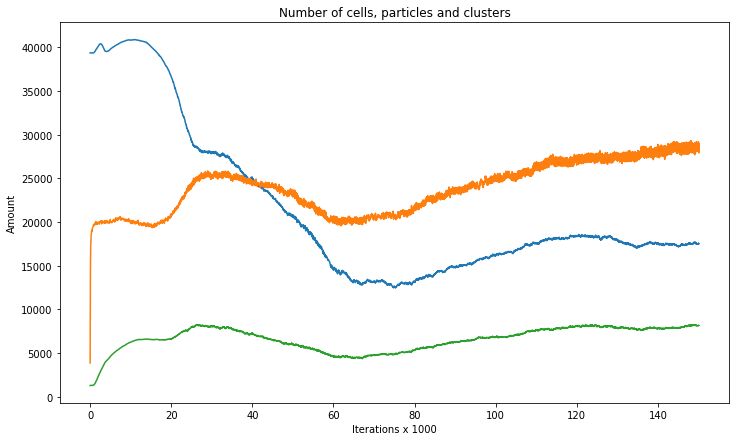

In [25]:
plt.plot(data_02_default['time step']/1000,data_02_default['number of cells'], label = 'number of cells')
plt.plot(data_02_default['time step']/1000, data_02_default['number of particles'], label = 'number of particles')
plt.plot(data_02_default['time step']/1000, data_02_default['number of clusters'], label = 'number of clusters')
plt.xlabel('Iterations x 1000')
plt.ylabel('Amount')
plt.title('Number of cells, particles and clusters');